In [18]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## Load the data 

In [11]:
data = fetch_openml('mnist_784', version=1, as_frame=False)
images = np.asarray(data.data)

## Add noise and train the model to reconstruct the clean image 

In [20]:
X = images / 255.0
noise_factor = 0.2
X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
X_noisy = np.clip(X_noisy, 0., 1.)

In [21]:
X_train_noisy, X_test_noisy, X_train_clean, X_test_clean = train_test_split(
    X_noisy[:5000], X[:5000], test_size=0.2, random_state=42
)

In [22]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train_noisy, X_train_clean)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Uniform weights are used by default.See the following example for a demonstration of the impact ofdifferent weighting schemes on predictions::ref:`sphx_glr_auto_examples_neighbors_plot_regression.py`.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this isequivalent to using manhattan_distance (l1), and euclidean_distance(l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.",2
,"metric metric: str, DistanceMetric object or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.If metric is a DistanceMetric object, it will be passed directly tothe underlying computation routines.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


## Evaluate the model performance 

In [31]:
mse_before = mean_squared_error(X_test_clean, X_test_noisy)
r2 = r2_score(X_test_clean, X_test_noisy)
print(f"MSE Score (before denoising): {mse_before:.4f}")
print(f"R2 Score (before denoising): {r2:.3f}")

MSE Score (before denoising): 0.0213
R2 Score (before denoising): -844.912


## Plot and predict the clean image

In [32]:
denoised_images = model.predict(X_test_noisy)
mse = mean_squared_error(X_test_clean, denoised_images)
r2 = r2_score(X_test_clean, denoised_images)

print(f"MSE Score: {mse:.4f}")
print(f"R2 Score: {r2:.3f}")

MSE Score: 0.0228
R2 Score: -0.342


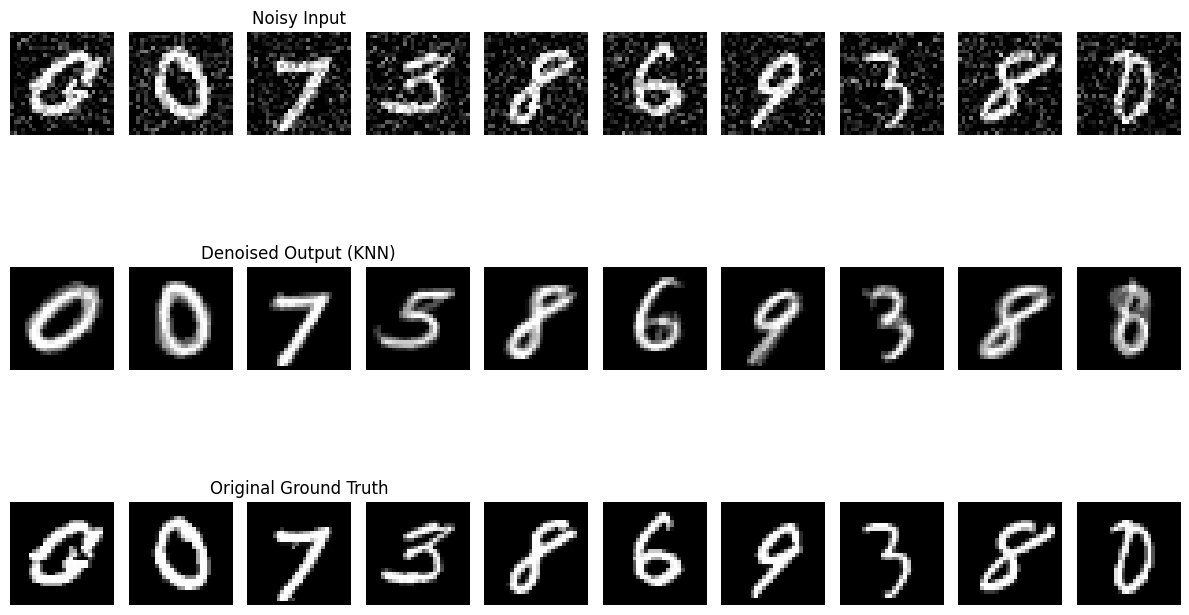

In [33]:
n = 10
plt.figure(figsize=(12, 8))

for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Noisy Input")
    plt.axis('off')

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Denoised Output (KNN)")
    plt.axis('off')

    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test_clean[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Original Ground Truth")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_noisy, X_train_clean)
denoised_images = lr_model.predict(X_test_noisy)

In [40]:
mse_before = mean_squared_error(X_test_clean, X_test_noisy) 
mse_after = mean_squared_error(X_test_clean, denoised_images) 

print(f"MSE Before (Noisy Data): {mse_before:.4f}")
print(f"MSE After (Cleaned Data): {mse_after:.4f}")
print(f"R2 Score: {r2:.3f}")

MSE Before (Noisy Data): 0.0213
MSE After (Cleaned Data): 0.0073
R2 Score: -0.342


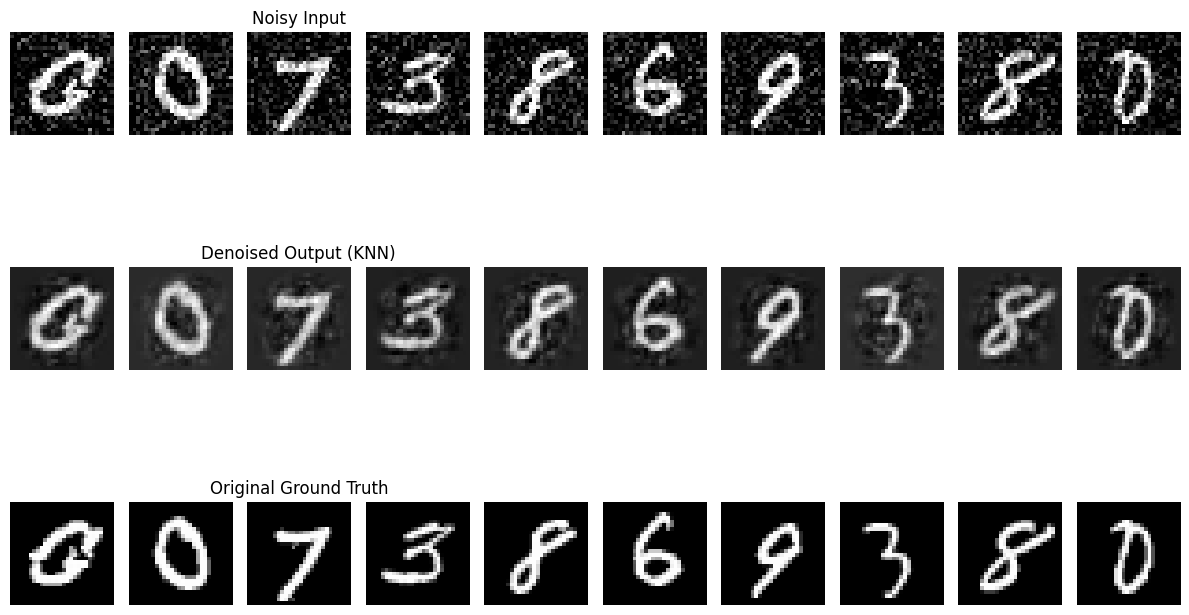

In [41]:
n = 10
plt.figure(figsize=(12, 8))

for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Noisy Input")
    plt.axis('off')

    plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Denoised Output (KNN)")
    plt.axis('off')

    plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(X_test_clean[i].reshape(28, 28), cmap='gray')
    if i == 2: plt.title("Original Ground Truth")
    plt.axis('off')
plt.tight_layout()
plt.show()